In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import tensorflow as tf
import importlib.util

import os, sys, pathlib, watermark

from IPython.display import Image
from ipywidgets import widgets, interact

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10
sns.set(font_scale=1.5)

In [80]:
# # TEST 

print("python", sys.version.split("|")[0], "\n")

assert 'pandas' in sys.modules and "pd" in locals()
print(watermark.watermark(packages = "pandas"))

assert 'numpy' in sys.modules and "np" in locals()
print(watermark.watermark(packages = "numpy"))

assert 'matplotlib' in sys.modules and "plt" in locals()
print(watermark.watermark(packages = "matplotlib"))

assert "data_directory" in locals() 


python 3.11.11  

pandas: 2.2.3

numpy: 2.0.2

matplotlib: 3.10.0



In [81]:
data = pd.read_csv('data.csv')
data

,x,y
0,0.765305,0.867769
1,-4.590188,-11.998300
2,-3.038538,-8.163570
3,-0.505511,-1.914896
4,-4.438790,-12.028043
...,...,...
295,-4.895823,-12.366365
296,-2.002381,-3.938511
297,0.999034,1.341256
298,-3.277003,-8.479990


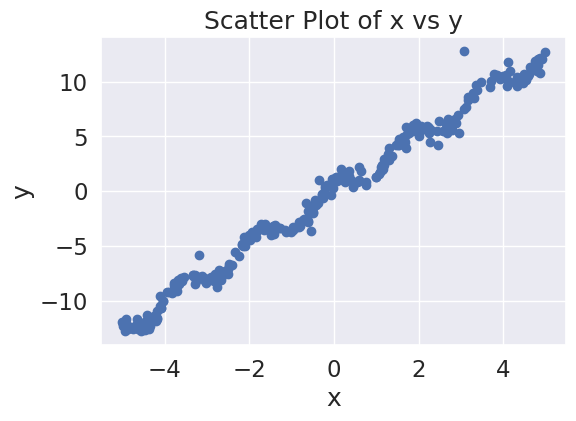

In [82]:
def scatter(x, y):
    plt.scatter(x, y)  # Create the scatter plot
    plt.xlabel("x")  # Label for x-axis
    plt.ylabel("y")  # Label for y-axis
    plt.title("Scatter Plot of x vs y")  # title

scatter(data['x'], data['y'])

In [83]:
correlation = (data['x']).corr(data['y'])
print(f"The correlation between x and y is: {correlation}")

The correlation between x and y is: 0.9929638359250121


In [84]:
def linear_model(x, theta):
    y = x * theta
    return y

In [85]:
def mse(y, y_hat):
    mse = np.mean((y - y_hat) ** 2)
    return mse

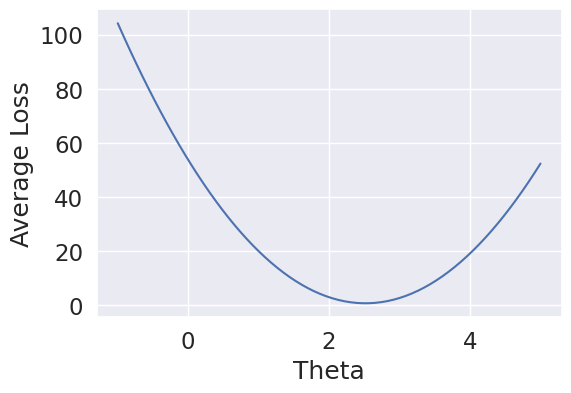

In [86]:
def visualize(x, y, thetas):
    avg_loss = [mse(y, linear_model(x, theta)) for theta in thetas] # Calculate the loss here for each value of theta
    
    plt.plot(thetas, avg_loss)
    plt.xlabel("Theta")
    plt.ylabel("Average Loss")
    
thetas = np.linspace(-1, 5, 70)
visualize(data["x"], data["y"], thetas)

In [87]:
theta_star_guess = 2.5
print(f"The estimated value of theta that minimizes the loss is: {theta_star_guess}")

The estimated value of theta that minimizes the loss is: 2.5


In [88]:
def function(theta):
    return np.mean((theta * data["x"] - data["y"])**2)

def derivative(theta):
    difference = theta * data["x"] - data["y"]
    return 2 * np.mean(difference * data["x"])

xrange = np.linspace(-1, 5, 100)

In [89]:
script_path = data_directory / 'helper_functions.py'
spec = importlib.util.spec_from_file_location("helper_functions", script_path)
helper_functions = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helper_functions)
sys.modules["helper_functions"] = helper_functions

def widget_function(Input):
     return helper_functions.plotter(Input, xrange, function, derivative)
interact(widget_function, Input=widgets.IntSlider(value=0, min=-1, max=5, step=1));

interactive(children=(IntSlider(value=0, description='Input', max=5, min=-1), Output()), _dom_classes=('widget…

In [90]:
def find_theta(x, y):
    numerator = np.sum(x * y)
    denominator = np.sum(x ** 2)
    theta_opt = numerator / denominator
    return theta_opt

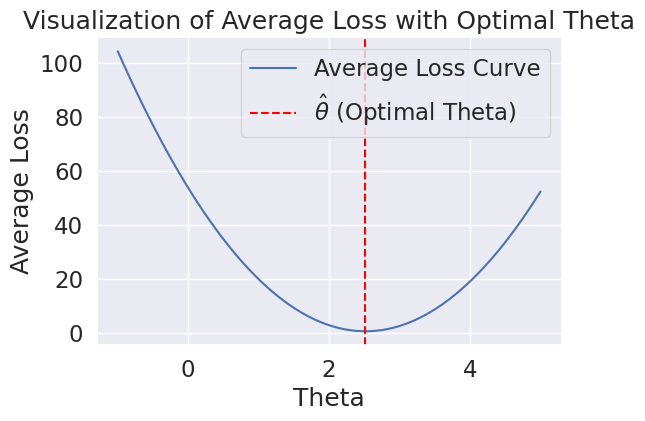

In [91]:
def visualize_with_optimal_theta(x, y, thetas):
    # average loss for each theta
    avg_loss = [mse(y, linear_model(x, theta)) for theta in thetas]

    # Plot the average loss curve
    plt.plot(thetas, avg_loss, label="Average Loss Curve")

    # the optimal theta
    theta_opt = find_theta(x, y)

    # Add a vertical line at the optimal theta
    plt.axvline(theta_opt, color='red', linestyle='--', label=r"$\hat{\theta}$ (Optimal Theta)")

    # labels and legend
    plt.xlabel("Theta")
    plt.ylabel("Average Loss")
    plt.title("Visualization of Average Loss with Optimal Theta")
    plt.legend()

    return theta_opt  # Return theta_opt for validation or further use

thetas = np.linspace(-1, 5, 70)  # Define theta values for the curve
x = data["x"]                    # Use the x values from your dataset
y = data["y"]                    # Use the y values from your dataset

# Call the visualization function
theta_opt = visualize_with_optimal_theta(x, y, thetas)


Text(0.5, 1.0, 'Scatter Plot with Best-Fit Line')

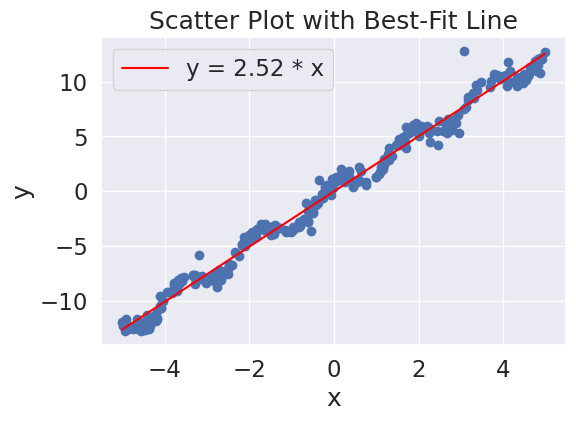

In [92]:
theta_opt = find_theta(data["x"], data["y"]) 
scatter(data["x"], data["y"]) 

# Add the best-fit line to the scatter plot
x_vals = np.linspace(min(data["x"]), max(data["x"]), 100)  
y_vals = theta_opt * x_vals 
plt.plot(x_vals, y_vals, color="red", label=f"y = {theta_opt:.2f} * x")  
plt.legend()  
plt.title("Scatter Plot with Best-Fit Line")  

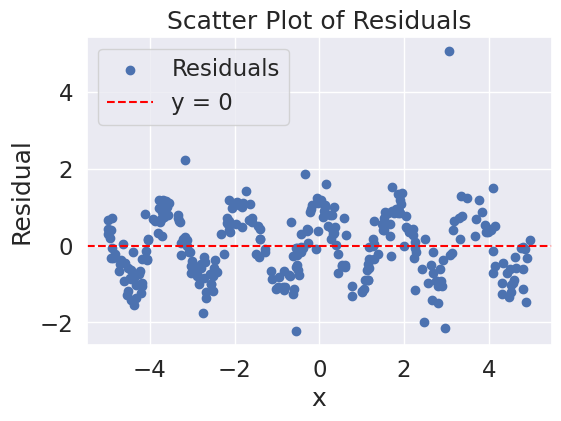

In [93]:
def visualize_residual(x, y):
    theta_opt = find_theta(x, y)
    residual = y - linear_model(x, theta_opt)
    plt.scatter(x, residual, label="Residuals")
    plt.axhline(y=0, color="red", linestyle="--", label="y = 0")
    plt.xlabel("x")
    plt.ylabel("Residual")
    plt.title("Scatter Plot of Residuals")
    plt.legend()
visualize_residual(data["x"], data["y"])

In [94]:
def cos_model(x, theta_1, theta_2):
    y = theta_1 * x + np.cos(theta_2 * x)
    return y

In [95]:
def dt1(x, y, theta):
    y_hat = cos_model(x, theta[0], theta[1])  
    difference = y_hat - y
    derivative = 2 * np.mean(difference * x)
    return derivative

In [96]:
def dt2(x, y, theta):
    y_hat = cos_model(x, theta[0], theta[1])  
    difference = y_hat - y
    derivative = 2 * np.mean(difference * (-np.sin(theta[1] * x) * x))
    return derivative

In [97]:
def dt(x, y, theta):
    return np.array([dt1(x,y,theta), dt2(x,y,theta)])

In [98]:
def initial_guess(number):
    return number * np.ones((2,))

In [99]:
def grad_desc(x, y, theta, num_iter=20, alpha=0.1):
    theta_history = []
    loss_history = []
    
    for i in range(1, num_iter + 1):
        d_t = dt(x,y,theta)
        theta = theta - alpha*d_t
        
        theta_history.append(theta)
        loss_history.append(mse(cos_model(x, theta[0], theta[1]), y))
    
    return theta, theta_history, loss_history

In [100]:
theta_hat_second_guess, theta_history_second_guess, average_loss_history_second_guess = grad_desc(data["x"], 
                                                                                                  data["y"],  
                                                                                                  initial_guess(3), 
                                                                                                  num_iter=20, 
                                                                                                  alpha=0.1)

assert len(average_loss_history_second_guess) == len(theta_history_second_guess) == 20
assert average_loss_history_second_guess[1] - average_loss_history_second_guess[-1] > 0 

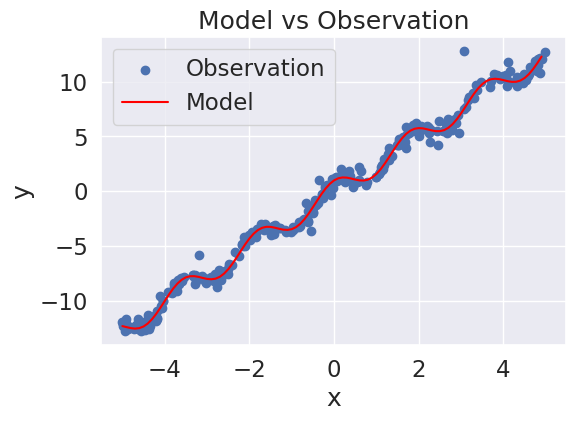

In [101]:
theta_hat, theta_history, average_loss_history = grad_desc(data["x"], 
                                                                 data["y"],  
                                                                 initial_guess(3), 
                                                                 num_iter=20, 
                                                                 alpha=0.1)



xrange = np.arange(-5,5,0.1)
y_hat = cos_model(xrange, theta_hat[0], theta_hat[1])
plt.scatter(data["x"], data["y"], label="Observation")  # Observed values
plt.plot(xrange, y_hat, label="Model", color="red")     # Predicted values (model)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model vs Observation")
plt.legend()  

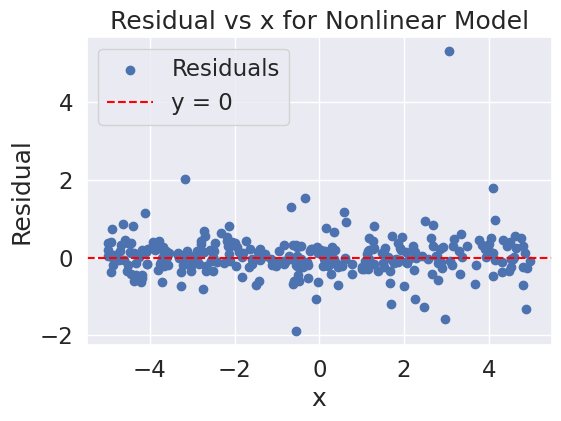

In [102]:
def visualize_residual_nonlinear(x, y):
    theta_hat, theta_history, average_loss_history = grad_desc(x, y, initial_guess(3), num_iter=20, alpha=0.1)
    residual = y - cos_model(x, theta_hat[0], theta_hat[1])
    plt.scatter(x, residual, label="Residuals")
    plt.axhline(y=0, color="red", linestyle="--", label="y = 0")
    plt.xlabel("x")
    plt.ylabel("Residual")
    plt.title("Residual vs x for Nonlinear Model")
    plt.legend()
visualize_residual_nonlinear(data["x"], data["y"])

In [103]:
INITIAL_GUESS = initial_guess(3)
NUM_ITER = 20
ALPHA = 0.1

THETA_1 = tf.Variable(INITIAL_GUESS[0], dtype=tf.float32)
THETA_2 = tf.Variable(INITIAL_GUESS[1], dtype=tf.float32)

In [104]:
def tf_mse(y_hat, y):
   mse = tf.reduce_mean(tf.square(y_hat - y))
   return mse

In [105]:
def tf_cos_model(x, theta_1, theta_2):
    y = tf.multiply(theta_1, x) + tf.math.cos(tf.multiply(theta_2, x))
    return y

In [106]:
def tf_grad_desc(x, y, theta, num_iter=20, alpha=0.1):   
    theta_history = []
    loss_history = []
    for i in range(1, num_iter + 1): 
        with tf.GradientTape() as tape:       
            loss = tf_mse(tf_cos_model(x, theta[0], theta[1]), y)
        tf_dt = tape.gradient(loss, [theta[0], theta[1]])
        theta[0].assign_sub(alpha * tf_dt[0])
        theta[1].assign_sub(alpha * tf_dt[1])
        theta_history.append([theta[0].numpy(), theta[1].numpy()])
        loss_history.append(tf_mse(tf_cos_model(x, theta[0], theta[1]), y).numpy())    
    return theta, theta_history, loss_history



In [107]:
tf_theta_hat, tf_theta_history, tf_average_loss_history = tf_grad_desc(data["x"], 
                                                                       data["y"],  
                                                                       (THETA_1, THETA_2), 
                                                                       num_iter=NUM_ITER, 
                                                                       alpha=ALPHA)

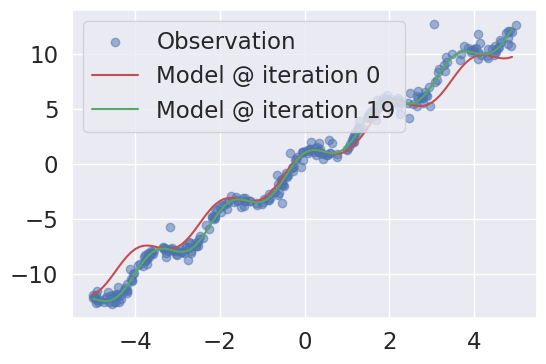

In [108]:
xrange = np.arange(-5,5,0.1)

plt.scatter(data["x"], data["y"], alpha=0.5, color = "b", label='Observation')

for idx, color in zip([0,19], ["r", "g"]):
    tf_theta_hat = tf_theta_history[idx]
    tf_y_hat = tf_cos_model(xrange, tf_theta_hat[0], tf_theta_hat[1]).numpy()

    plt.plot(xrange, tf_y_hat, label=f'Model @ iteration {idx}', color = color)

plt.legend();